<a href="https://colab.research.google.com/github/aryanugraha04/credit-risk-prediction-app/blob/main/Credit%20Risk%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Kelompok 3 - SI4610**

##Anggota Kelompok :


1.   M. Ali Imron Almuzaky (1202223312)
2.   Muhammad Handra Haq (1202223014)
3.   Rayhan Mulia Pratama (1202223240)
4.   Arya Nugraha (1202220125)

---









#**Aplikasi Prediksi Resiko Kredit untuk Meningkatkan Keputusan Pemberian Pinjaman**

##📚**Latar Belakang**
Pengelolaan risiko kredit merupakan aspek fundamental dalam operasi lembaga keuangan, terutama bank dan institusi pemberi pinjaman. Risiko kredit adalah kemungkinan seorang peminjam gagal memenuhi kewajiban pembayaran, yang dapat menyebabkan kerugian finansial bagi pemberi pinjaman. Oleh karena itu, kemampuan untuk memprediksi risiko kredit dengan akurat menjadi sangat penting.

##📊**Overview Dataset**
Dataset yang digunakan dalam tugas besar ini diperoleh dari kaggle, menggunakan dataset dari Lao Tse yaitu https://www.kaggle.com/datasets/laotse/credit-risk-dataset/data. Berikut ini adalah deskripsi dari kolom-kolom dataset tersebut:


*   **person_age**: Kolom ini berisi data usia peminjam
*   **person_income**: Kolom ini berisi data pendapatan tahunan peminjam
*   **person_home_ownership**: Kolom ini berisi status kepemilikan rumah peminjam, yang memiliki nilai kategori seperti:

  *  **RENT**: Peminjam menyewa tempat tinggal.
  *  **OWN**: Peminjam memiliki rumah.
  *  **MORTGAGE**: Peminjam memiliki rumah tetapi masih mencicil.
  *  **OTHER**: Status lain.

*   **person_emp_length**: Kolom ini berisi data lama bekerja peminjam dalam tahun
*   **loan_intent**: Kolom ini berisi data tujuan pinjaman digunakan untuk apa, yang memiliki nilai kategori:

  *  **EDUCATION**: Pinjaman untuk pendidikan.
  *  **MEDICAL**: Pinjaman untuk kebutuhan medis.
  *  **VENTURE**: Pinjaman untuk bisnis/usaha.
  *  **PERSONAL**: Pinjaman pribadi untuk berbagai kebutuhan.
  *  **DEBTCONSOLIDATION**: Pinjaman untuk konsolidasi utang.
  *  **HOMEIMPROVEMENT**: Pinjaman untuk perbaikan rumah.


*   **loan_grade**: Kolom ini berisi data indikator kualitas pinjaman yang mencerminkan risiko kredit peminjam. Semakin tinggi loan grade, semakin kecil kemungkinan peminjam akan gagal bayar. Indikator dalam data ini dinyatakan dalam bentuk huruf:

  *  **A**: Kualitas pinjaman sangat baik (risiko rendah).
  *  **B, C**: Kualitas pinjaman menengah (risiko moderat).
  *  **D, E, F, G**: Kualitas pinjaman lebih rendah (risiko tinggi).


*   **loan_amnt**: Kolom ini berisi data jumlah pinjaman yang diminta atau disetujui.
*   **loan_int_rate**: Kolom ini berisi data tingkat bunga tahunan yang dikenakan pada pinjaman.
*   **loan_status**: Kolom ini berisi data label status pinjaman pelanggan. Label ini bernilai biner:

  *  **0**: Non-default, menunjukkan bahwa peminjam layak menerima pinjaman kredit.
  *  **1**: Default, menunjukkan bahwa peminjam tidak layak menerima pinjaman kredit.


*   **loan_percent_income**: Kolom ini berisi persentase jumlah pinjaman (loan_amnt) terhadap pendapatan tahunan peminjam (person_income). Semakin tinggi persentasenya, semakin besar beban pinjaman terhadap kemampuan finansial peminjam, yang dapat meningkatkan risiko gagal bayar.
*   **cb_person_default_on_file**: Kolom ini menunjukkan apakah peminjam pernah gagal bayar pada catatan kredit sebelumnya. Kolom ini berisi:

  *  **YES**: Peminjam memiliki catatan gagal bayar.
  *  **NO**: Peminjam memiliki catatan tidak gagal bayar.

*   **cb_preson_cred_hist_length**: Kolom ini menunjukkan panjang riwayat kredit peminjam dalam satuan tahun (credit history length).

##**🚀 Objectives of the Solution**
Penerapan model aplikasi ini bertujuan untuk:

1.   Mengidentifikasi variabel-variabel utama dalam dataset yang memiliki dampak signifikan terhadap risiko kredit.
2.   Mengembangkan model prediksi risiko kredit berbasis machine learning menggunakan dataset Credit Risk dari Kaggle.
3. Membandingkan performa beberapa algoritma machine learning untuk menemukan metode terbaik dalam memprediksi risiko kredit.
4. Memberikan rekomendasi bagi lembaga keuangan dalam penerapan teknologi analitik untuk mendukung pengelolaan risiko kredit.

---






#**🤔Data Understanding**
Langkah ini bertujuan untuk memahami karakteristik data, pola, dan masalah potensial dalam dataset.



##📂**Read Data**
Pada bagian ini merupakan proses memuat dataset yang telah dikumpulkan untuk analisis. Dataset ini berisi data-data peminjam dan disimpan dalam file CSV. Berikut adalah langkah-langkah untuk memuat dan menampilkan data:

In [ ]:
import pandas as pd
url = 'https://drive.google.com/uc?export=download&id=1gqvlP-GwSg1rXht4NW5KMRBkcMZ9XcpH'
df = pd.read_csv(url)
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB




*   **Drop Duplicates**

Menghapus duplikasi dalam data adalah langkah krusial untuk memastikan bahwa model yang dilatih tidak bias dan akurat. Berikut adalah langkah-langkah untuk menangani duplikasi dalam dataset:


In [ ]:
df.duplicated().sum()

165

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

##**Handling Missing Values**
Pada langkah berikutnya adalah melakukan perubahan pada kolom yang memiliki nilai null. Disini kami mencoba menggunakan mean.



*   **Menggunakan Mean**

Pada bagian ini, nilai null akan diisi oleh nilai mean kolom tersebut. Kolom yang memiliki nilai null ada 2 yaitu **"person_emp_length"** dan **"loan_int_rate"**. Hal ini dilakukan untuk menghindari kehilangan data sambil tetap mempertahankan nilai yang representatif



In [ ]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,887
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3095
loan_status,0
loan_percent_income,0


In [ ]:
df["person_emp_length"] = df["person_emp_length"].fillna(df["person_emp_length"].mean())
df["loan_int_rate"] = df["loan_int_rate"].fillna(df["loan_int_rate"].mean())

In [ ]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               32416 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB




*   **Mengecek kembali ringkasan statistik data**



In [ ]:
features = df.select_dtypes(include=['number']).drop('loan_status', axis=1).columns
df[features].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.790510,9593.845632,11.017265,0.170250,5.811297
std,6.354100,6.201558e+04,4.088378,6322.730241,3.083040,0.106812,4.059030
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.000000,5000.000000,8.490000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.017265,0.150000,4.000000
75%,30.000000,7.921800e+04,7.000000,12250.000000,13.110000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


##**Analisis Data**




*   **Outlier Handling**

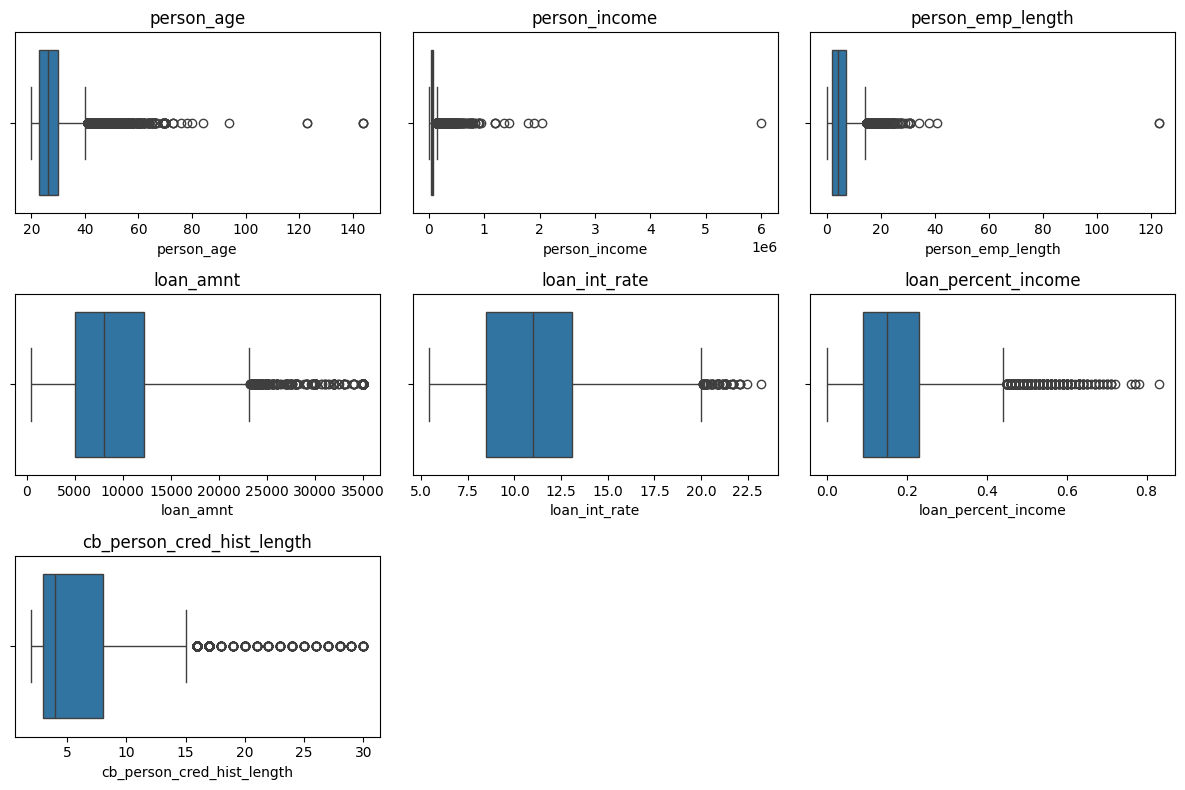

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = len(features)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

plt.figure(figsize=(12, 8))

for i, column in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)  # Adjust subplot layout
    sns.boxplot(x=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    initial_count = df.shape[0]
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    final_count = df.shape[0]
    return df, initial_count != final_count

columns_to_clean = features

outliers_removed = True
while outliers_removed:
    outliers_removed = False
    for col in columns_to_clean:
        df, removed = remove_outliers_iqr(df, col)
        if removed:
            outliers_removed = True

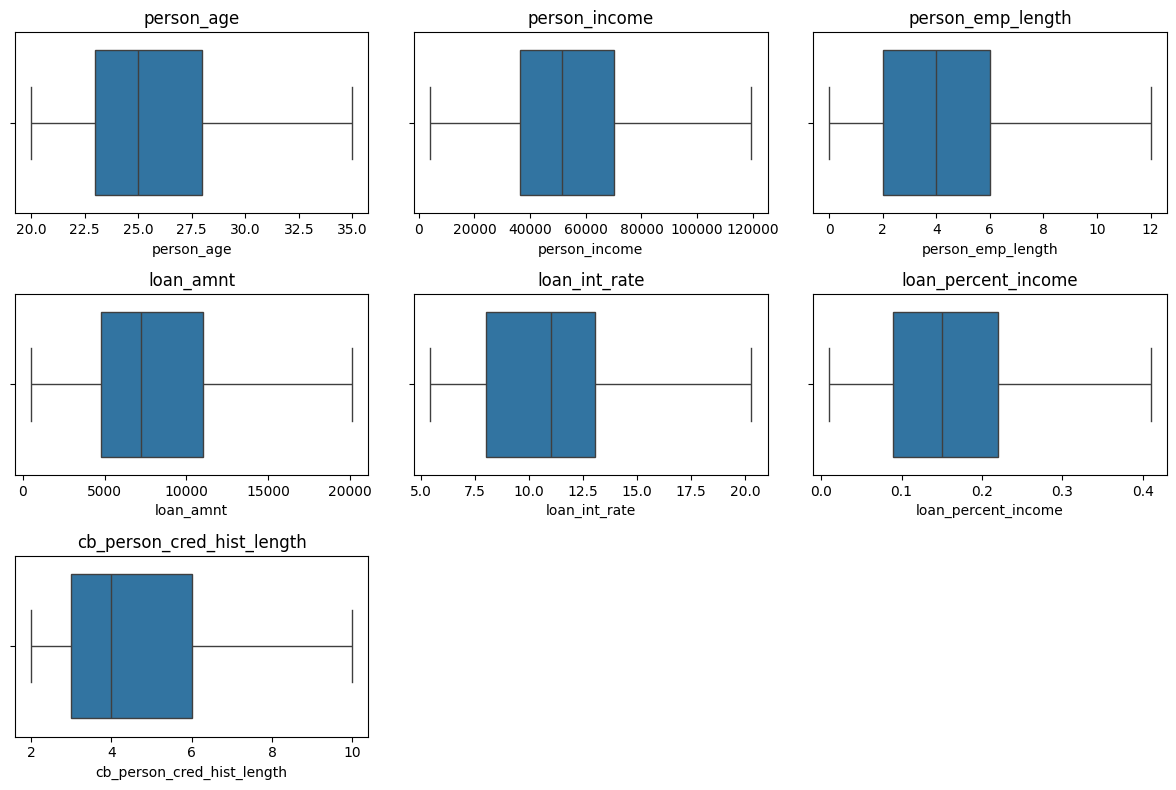

In [ ]:
num_features = len(features)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

plt.figure(figsize=(12, 8))

for i, column in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)  # Adjust subplot layout
    sns.boxplot(x=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

*Boxplot* menunjukkan bahwa hampir semua variabel memiliki outlier signifikan. Lalu, banyak variabel memiliki distribusi yang tidak simetris. Oleh karena itu, perlu dianalisis lebih lanjut untuk memahami penyebabnya, apakah memang nilai valid atau data noise.



*   **Visualisasi Distribusi tiap kolom**



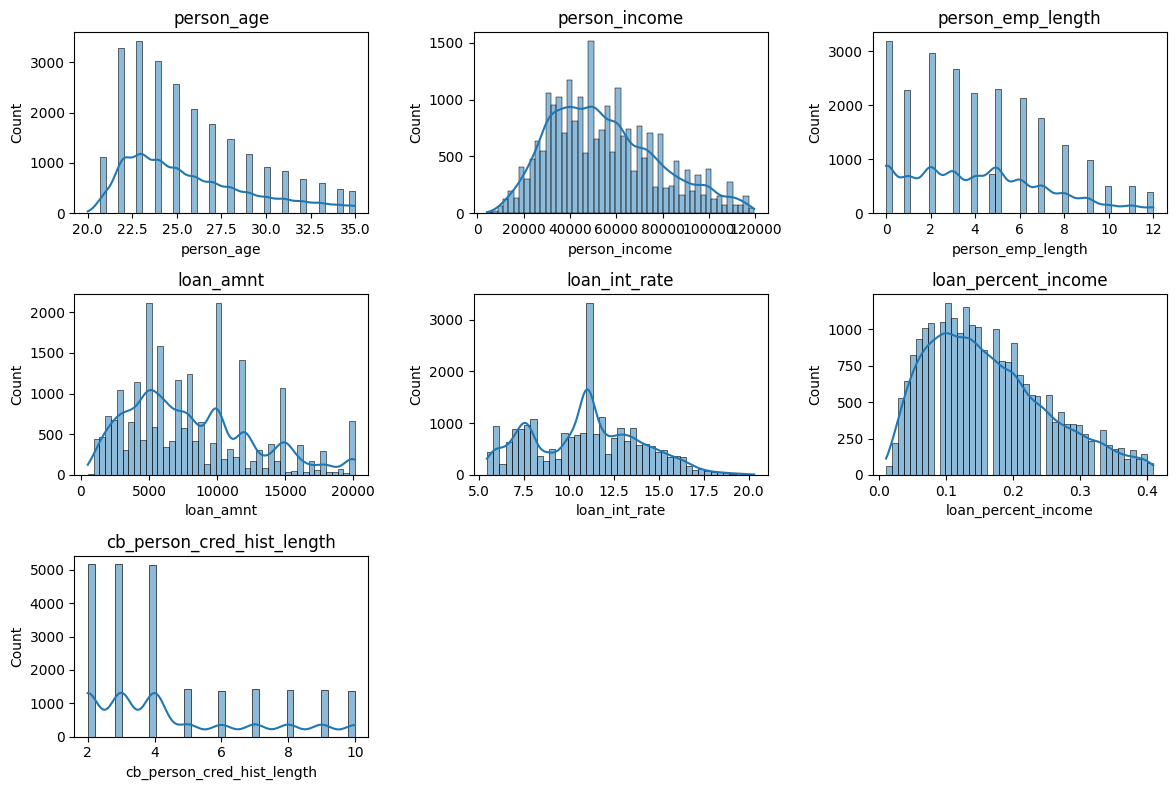

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = len(features)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

plt.figure(figsize=(12, 8))

for i, column in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)  # Adjust subplot layout
    sns.histplot(df[column], kde=True)  # Use histplot with KDE (Kernel Density Estimate)
    plt.title(column)

plt.tight_layout()
plt.show()


##**Data Imbalance**

In [ ]:
print(df['loan_status'].value_counts())

loan_status
0    18892
1     4974
Name: count, dtype: int64


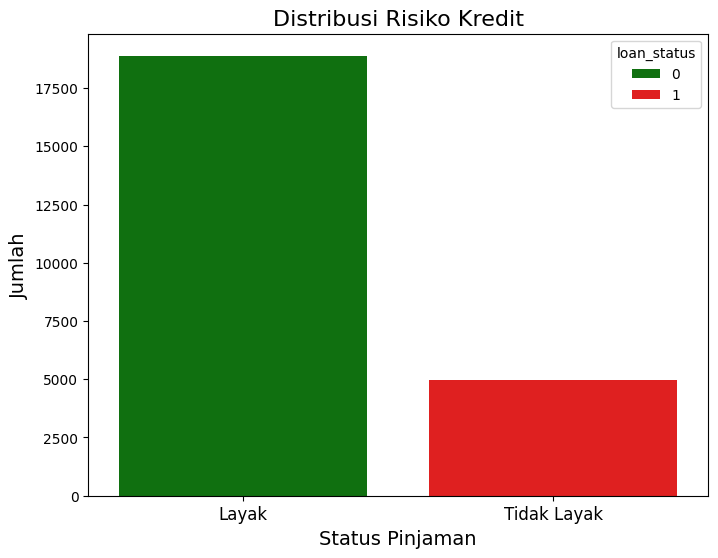

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan_status', hue='loan_status', dodge=False, palette=['green', 'red'])
plt.title("Distribusi Risiko Kredit", fontsize=16)
plt.xlabel("Status Pinjaman", fontsize=14)
plt.ylabel("Jumlah", fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Layak', 'Tidak Layak'], fontsize=12)
plt.show()

Dari grafik distribusi resiko kredit, terlihat bahwa dataset memiliki **jumlah data yang sangat berbeda jauh** antara **label Layak** dan **Tidak Layak**. Maka dari itu perlu untuk menyeimbangkan data agar analisis menjadi lebih mudah untuk dilakukan.



*   **Melakukan Encoding variabel kategorikal untuk kolom person_home_ownership, loan_intent, dan loan_grade.**



In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,1,0.16,N,2
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3


In [ ]:
from sklearn.preprocessing import StandardScaler

# Mengidentifikasi kolom kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
# One-hot encoding pada variabel kategorikal
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

#standarisasi variabel numerik
scaler = StandardScaler()
numeric_features = ['person_age', 'person_income', 'person_emp_length', 'cb_person_cred_hist_length']
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

In [ ]:
df_encoded.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,-1.346645,-1.933823,0.274500,1000,11.14,0,0.10,-1.048301,False,True,...,False,False,False,True,False,False,False,False,False,False
5,-1.346645,-1.920990,-0.703282,2500,7.14,1,0.25,-1.048301,False,True,...,False,False,True,False,False,False,False,False,False,False
9,-1.346645,-1.916712,0.600428,1600,14.74,1,0.16,-0.641433,False,True,...,False,False,True,False,False,True,False,False,False,False
19,-0.500577,-1.882491,1.252283,1750,10.99,1,0.16,-1.048301,False,False,...,False,False,False,True,False,False,False,False,False,False
23,-0.500577,-1.874791,-1.355138,1500,7.29,0,0.14,-0.641433,False,True,...,False,True,False,False,False,False,False,False,False,False


#**🔍Membuat 2 Algoritma Models**
Langkah ini melibatkan pembuatan dan pelatihan model machine learning untuk mengklasifikasikan peminjam akan gagal bayar atau tidak. Berikut merupakan 2 Algoritma Models yang akan kita gunakan:


1.   Random Forest Classifier
2.   K-Means Clustering





*   **Balancing Data (for classification)**



In [ ]:
majority = df[df['loan_status'] == 0]
minority = df[df['loan_status'] == 1]
minority_oversampled = minority.sample(n=len(majority), replace=True, random_state=42)

df_balanced = pd.concat([majority, minority_oversampled])
print("Distribusi Kelas Setelah Balancing:\n", df_balanced['loan_status'].value_counts())


Distribusi Kelas Setelah Balancing:
 loan_status
0    18892
1    18892
Name: count, dtype: int64




*   **Splitting Dataset Into Training and Testing Data (80:20)**



In [ ]:
from sklearn.model_selection import train_test_split

# Fitur dan target
X = df_balanced.drop(columns=["loan_status", "person_home_ownership", "loan_amnt", "loan_intent", "loan_grade", "cb_person_default_on_file", "cb_person_cred_hist_length"], axis=1)
y = df_balanced["loan_status"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print distribusi data latih dan data uji
print("Distribusi Kelas pada Data Latih:\n", y_train.value_counts())
print("Distribusi Kelas pada Data Uji:\n", y_test.value_counts())

Distribusi Kelas pada Data Latih:
 loan_status
1    15116
0    15111
Name: count, dtype: int64
Distribusi Kelas pada Data Uji:
 loan_status
0    3781
1    3776
Name: count, dtype: int64




*   **Random Forest Classifier**



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model_rf = RandomForestClassifier()
scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='accuracy')

model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model_rf.predict(X_test)

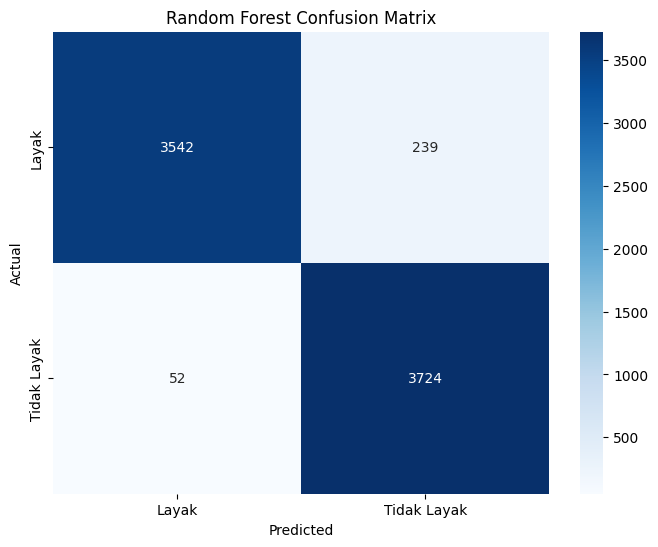

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Layak', 'Tidak Layak'],
            yticklabels=['Layak', 'Tidak Layak'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [ ]:
predictions_train = model_rf.predict(X_train)
predictions_test = model_rf.predict(X_test)

train_accuracy = accuracy_score(y_train, predictions_train)
test_accuracy = accuracy_score(y_test, predictions_test)

mse = mean_squared_error(y_test, predictions_test)
r_squared = r2_score(y_test, predictions_test)

if train_accuracy > test_accuracy + 0.05:
    print("Model kemungkinan overfitting.")
elif train_accuracy < test_accuracy - 0.05:
    print("Model kemungkinan underfitting.")
else:
    print("Model well-fitted.")

print(f"Random Forest Mean Squared Error -> {mse:.2f}")
print(f"Random Forest Proporsi Varians -> {r_squared:.2f}")
print(f"Random Forest Accuracy Score Training -> {train_accuracy:.2f}")
print(f"Random Forest Accuracy Score Testing -> {test_accuracy:.2f}")

print(f"Random Forest Classification Report:")
print(classification_report(y_test, predictions_test))

Model well-fitted.
Random Forest Mean Squared Error -> 0.04
Random Forest Proporsi Varians -> 0.85
Random Forest Accuracy Score Training -> 1.00
Random Forest Accuracy Score Testing -> 0.96
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      3781
           1       0.94      0.99      0.96      3776

    accuracy                           0.96      7557
   macro avg       0.96      0.96      0.96      7557
weighted avg       0.96      0.96      0.96      7557





*   **Menghitung ROC-AUC Score**



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

y_proba = model_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

print(f"AUC: {roc_auc}")

AUC: 0.9948570629687241


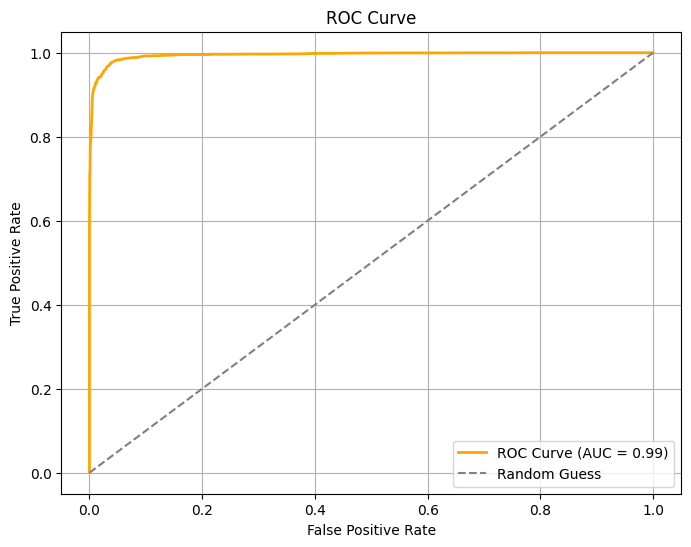

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()



*   **K-Means Clustering**



In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Mendefinisikan Fitur untuk Klasterisasi
X = df.drop(columns=["loan_status", "person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"], axis=1)

In [ ]:
inertia = []

K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=12).fit(X)
    inertia.append(kmeans.inertia_)

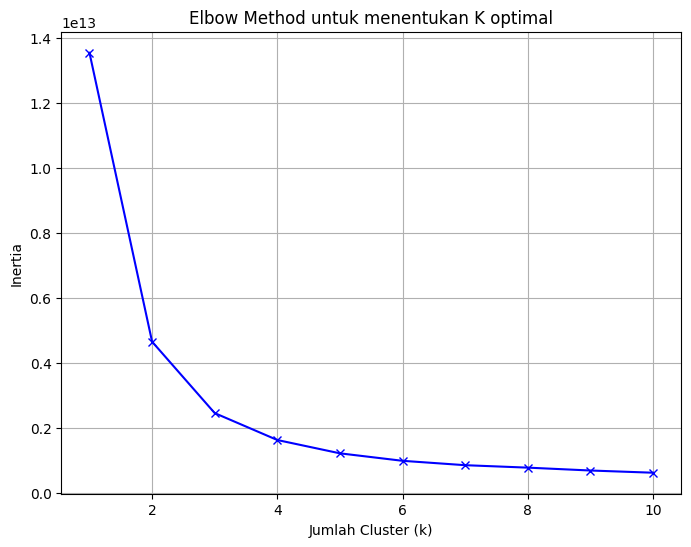

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(K, inertia, 'bx-')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method untuk menentukan K optimal")
plt.grid()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=12).fit(X)

In [ ]:
labels = kmeans.labels_

new_df = df.copy()
new_df['cluster'] = labels
new_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,cluster
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3,0
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,1,0.16,N,2,0
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3,0


In [ ]:
predicted_cluster = kmeans.predict(X)
predicted_cluster

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

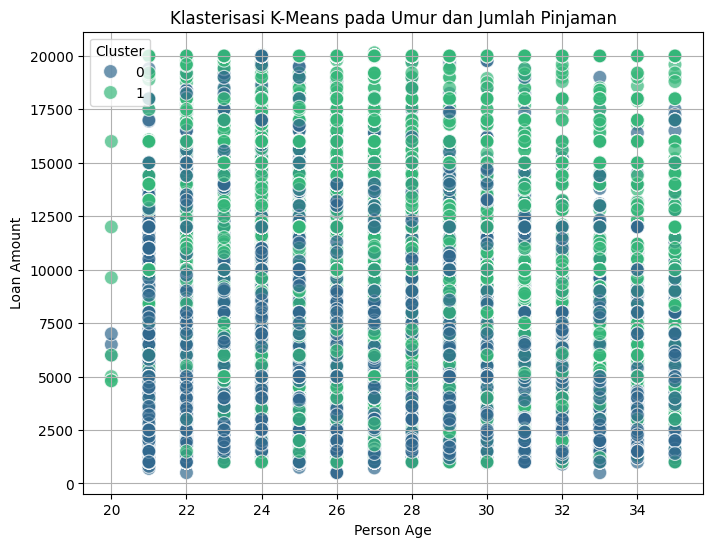

In [ ]:
import seaborn as sns

#visualisasi 1
plt.figure(figsize=(8,6))
sns.scatterplot(x='person_age', y='loan_amnt', hue='cluster', data=new_df, palette='viridis', s=100, alpha=0.7)
plt.title("Klasterisasi K-Means pada Umur dan Jumlah Pinjaman")
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


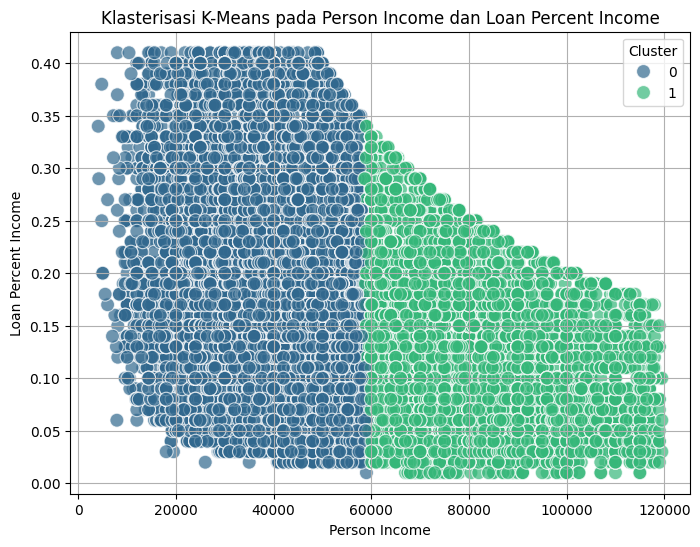

In [ ]:
#visualisasi 2
plt.figure(figsize=(8,6))
sns.scatterplot(x='person_income', y='loan_percent_income', hue='cluster', data=new_df, palette='viridis', s=100, alpha=0.7)
plt.title("Klasterisasi K-Means pada Person Income dan Loan Percent Income")
plt.xlabel("Person Income")
plt.ylabel("Loan Percent Income")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


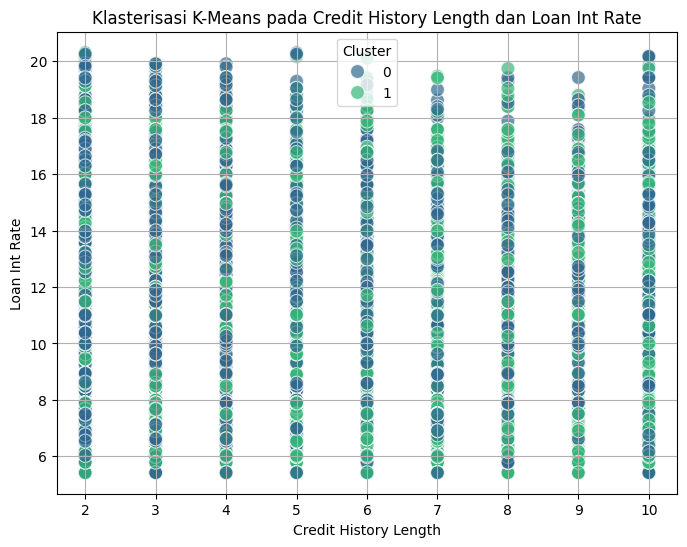

In [ ]:
#visualisasi 3
plt.figure(figsize=(8,6))
sns.scatterplot(x='cb_person_cred_hist_length', y='loan_int_rate', hue='cluster', data=new_df, palette='viridis', s=100, alpha=0.7)
plt.title("Klasterisasi K-Means pada Credit History Length dan Loan Int Rate")
plt.xlabel("Credit History Length")
plt.ylabel("Loan Int Rate")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.5510759417609864


#**⚙️ Hyperparameter Tuning Models**
Pada langkah ini, proses hyperparameter tuning dilakukan untuk meningkatkan performa model. Grid Search digunakan untuk mencari kombinasi hyperparameter terbaik untuk model K-Means Clustering.



*   **K-Means Clustering**



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_km = {
    'n_clusters': [2, 3, 4, 5],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30],
}

In [ ]:
grid_search = GridSearchCV(KMeans(), param_grid=param_grid_km, cv=5)
grid_search.fit(X)

GridSearchCV(cv=5, estimator=KMeans(),
             param_grid={'init': ['k-means++', 'random'],
                         'n_clusters': [2, 3, 4, 5], 'n_init': [10, 20, 30]})

In [ ]:
best_score = -1
best_params = None

In [ ]:
from sklearn.metrics import silhouette_score

for params in grid_search.cv_results_['params']:
    model = KMeans(**params)
    cluster_labels = model.fit_predict(X)
    score = silhouette_score(X, cluster_labels)

    if score > best_score:
        best_score = score
        best_params = params

In [ ]:
print(f"Best Silhouette Score: {best_score:.3f}")
print("Best Parameters:", best_params)

Best Silhouette Score: 0.551
Best Parameters: {'init': 'k-means++', 'n_clusters': 2, 'n_init': 20}


#**🤖Deployment**
*Deployment* adalah tahap terakhir dalam proses data mining yang bertujuan untuk menerapkan model atau hasil analisis ke dunia nyata. Fungsi dari *deployment* sendiri yaitu untuk membantu organisasi menggunakan data sebagai
dasar keputusan strategis dan memungkinkan pengguna untuk memonitor kinerja model di lingkungan nyata dan memperbaruinya jika diperlukan.



*   **Ekspor Model**

Ekspor model adalah proses menyimpan model machine learning yang telah dilatih ke dalam file sehingga dapat digunakan kembali tanpa harus melatih ulang. Proses ini penting untuk deployment model karena memungkinkan model digunakan di
lingkungan produksi atau diintegrasikan ke aplikasi.


In [ ]:
from joblib import dump

In [ ]:
dump(model_rf, 'random_forest_model.joblib')

['random_forest_model.joblib']



*   **Tools Deployment**

Dalam proses *deployment*, terutama untuk model atau aplikasi berbasis data mining, kita memerlukan alat yang dapat mempermudah pembuatan antarmuka aplikasi dan mengaksesnya secara publik. Streamlit dan Ngrok adalah dua tools yang akan dipakai pada *deployment* ini.


In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00


In [ ]:
pip install pyngrok

In [ ]:
!ngrok config add-authtoken 2qyqoluk0pbYIyldhoNtKBqtx79_7LtpW4ftGmu6XpVPKAqbc

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml




*   **Implementasi Streamlit dan Ngrok**



In [ ]:
%%writefile home.py

import streamlit as st

st.markdown(
      """
      <style>
      .main-header {
          background-color: #123456;
          padding: 15px;
          border-radius: 15px;
          margin-bottom: 20px;
          box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);
      }
      .main-header h1 {
          color: #f0f0f0;
          text-align: center;
          font-size: 30px;
          font-weight: bold;
          font-family: 'Verdana', sans-serif;
      }
      .metrics-box {
          display: flex;
          justify-content: space-around;
          margin-bottom: 20px;
      }
      .metric {
          background: rgba(255, 255, 255, 0.1);
          border-radius: 10px;
          padding: 10px;
          text-align: center;
          font-size: 16px;
          width: 20%;
          box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);
      }
      </style>
      <div class="main-header">
          <h1>📈 Aplikasi Prediksi Risiko Kredit</h1>
      </div>
      """,
      unsafe_allow_html=True
      )

st.subheader("Halo, Selamat Datang 👋")
st.write("\n")
st.write(
  """
  Aplikasi Prediksi Risiko Kredit bertujuan untuk memprediksi apakah peminjam akan berisiko tidak layak diberikan kredit atau tidak berdasarkan data tertentu.
  Aplikasi ini menggunakan algoritma Random Forest Classifier untuk membantu lembaga keuangan atau bank dalam mengambil keputusan yang lebih baik
  terkait pemberian kredit terhadap peminjam.
  """
)

st.subheader("✨ Fitur Utama Aplikasi")
st.write("\n")
st.write(
  """
- **Prediksi Risiko Kredit**: Analisis apakah seorang peminjam berisiko tidak layak diberikan kredit atau tidak.
- **Visualisasi Data**: Tampilkan metrik evaluasi model seperti ROC curve, confusion matrix, dll.
- **Akurasi Tinggi**: Menggunakan Random Forest Classifier yang telah diuji untuk akurasi tinggi.
  """
)

st.subheader("🛠️ Cara Menggunakan Aplikasi")
st.write("\n")
st.write(
  """
1. Pilih menu **Dashboard (Classification)** di sidebar.
2. Masukkan data pribadi seperti usia, pendapatan, dan lama bekerja.
3. Pilih kategori seperti kepemilikan rumah, dan tujuan pinjaman
4. Klik tombol **Predict** untuk mendapatkan hasil prediksi.
  """
)


Writing home.py


In [ ]:
!pip install gdown --quiet

import os

drive_links = [
    "1TpG-7J2s644AZ7tlqg-5YTYAaphxAY7o",
    "1DeEcHjU5ZRL11XQukzb-jZaPod9MlNcm",
    "1cpJOuP-O9l53I0eGhgICnU_JDBrcMocy",
    "19thyGJb8XMGBg537LwnhOWDwGFcTMfCX"
]
names = ["Handra", "Ali", "Rayhan", "Arya"]

output_dir = "/content/sample_data"
os.makedirs(output_dir, exist_ok=True)

for file_id, name in zip(drive_links, names):
    output_file = os.path.join(output_dir, f"{name}.jpg")
    !gdown --id {file_id} -O {output_file}

!ls /content/sample_data


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1TpG-7J2s644AZ7tlqg-5YTYAaphxAY7o
To: /content/sample_data/Handra.jpg
100% 532k/532k [00:00<00:00, 8.37MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1DeEcHjU5ZRL11XQukzb-jZaPod9MlNcm
To: /content/sample_data/Ali.jpg
100% 83.7k/83.7k [00:00<00:00, 50.3MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
F

In [ ]:
%%writefile about_us.py

import streamlit as st

st.title("Data Mining SI-46-10 Kelompok 3")
st.write("Kenalan dulu yuk dengan anggota kelompok 3😊")

col1, col2, col3, col4 = st.columns(4, gap="small", vertical_alignment="center")
with col1:
    st.image("/content/sample_data/Handra.jpg", caption = "Muhammad Handra Haq", use_container_width=True)

with col2:
    st.image("/content/sample_data/Ali.jpg", caption="M. Ali Imron Almuzaky", use_container_width=True)

with col3:
    st.image("/content/sample_data/Arya.jpg", caption="Arya Nugraha", use_container_width=True)

with col4:
    st.image("/content/sample_data/Rayhan.jpg", caption= "Rayhan Mulia Pratama", use_container_width=True)



Writing about_us.py


In [ ]:
%%writefile risk_dashboard.py

# Import Library yang akan dipakai
import pandas as pd
import numpy as np
import streamlit as st
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.preprocessing import StandardScaler
from joblib import load

# Inisiasi variabel untuk memuat model yang sudah dilatih menggunakan joblib untuk load model
classifier = load('random_forest_model.joblib')

# Mapping fitur kategorikal ke angka
home_ownership_map = {"RENT": 0, "OWN": 1, "MORTGAGE": 2}
loan_intent_map = {"EDUCATION": 0, "MEDICAL": 1, "PERSONAL": 2, "VENTURE": 3, "HOMEIMPROVEMENT": 4, "DEBTCONSOLIDATION": 5}

# Buat Fungsi yang dapat mengeluarkan hasil prediksi dari model berdasarkan input dari user
def prediction(person_age, person_income, person_emp_length, person_home_ownership, loan_intent):
    person_home_ownership = home_ownership_map[person_home_ownership]
    loan_intent = loan_intent_map[loan_intent]

    input_data = np.array([[person_age, person_income, person_emp_length, person_home_ownership, loan_intent]])
    input_data = input_data.astype(float)
    pred = classifier.predict(input_data)
    proba = classifier.predict_proba(input_data)[:, 1]
    return pred, proba

# Buat fungsi yang dapat mengeluarkan metrik evaluasi model
def evaluate_model(X_test, y_test):
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test) [:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    return accuracy, precision, recall, f1, roc_auc, y_pred, y_pred_proba


# Buat fungsi untuk membuat visualisasi plot kurva ROC
def plot_roc_curve(fpr, tpr, auc):
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    st.pyplot(plt)


# Buat fungsi untuk membuat visualisasi confusion matrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Layak', 'Tidak Layak'], yticklabels=['Layak', 'Tidak Layak'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    st.pyplot(plt)

st.title("Dashboard Prediksi Risiko Kredit")

url = 'https://drive.google.com/uc?export=download&id=1gqvlP-GwSg1rXht4NW5KMRBkcMZ9XcpH'
df = pd.read_csv(url)
df["person_emp_length"] = df["person_emp_length"].fillna(df["person_emp_length"].mean())
df["loan_int_rate"] = df["loan_int_rate"].fillna(df["loan_int_rate"].mean())

features = df.select_dtypes(include=['number']).drop('loan_status', axis=1).columns
df[features].describe()

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    initial_count = df.shape[0]
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    final_count = df.shape[0]
    return df, initial_count != final_count

columns_to_clean = features

outliers_removed = True
while outliers_removed:
    outliers_removed = False
    for col in columns_to_clean:
        df, removed = remove_outliers_iqr(df, col)
        if removed:
            outliers_removed = True

majority = df[df['loan_status'] == 0]
minority = df[df['loan_status'] == 1]
minority_oversampled = minority.sample(n=len(majority), replace=True, random_state=42)
df_balanced = pd.concat([majority, minority_oversampled])
print("Distribusi Kelas Setelah Balancing:\n", df_balanced['loan_status'].value_counts())

X = df_balanced.drop(columns=["loan_status", "person_home_ownership", "loan_amnt", "loan_intent", "loan_grade", "cb_person_default_on_file", "cb_person_cred_hist_length"], axis=1)
y = df_balanced['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

accuracy, precision, recall, f1, roc_auc, y_pred, y_pred_proba = evaluate_model(X_test, y_test)

accuracy_train = accuracy_score(y_train, classifier.predict(X_train))
precision_train = precision_score(y_train, classifier.predict(X_train))
recall_train = recall_score(y_train, classifier.predict(X_train))
f1_train = f1_score(y_train, classifier.predict(X_train))
accuracy_gap = abs(accuracy_train - accuracy)

st.markdown("### 📊 Metrik Evaluasi Model")
st.write("Data Hasil Training Model: ")
col1, col2, col3, col4 = st.columns(4)

with col1:
    st.success(f"Accuracy: {accuracy_train:.2f}")

with col2:
    st.info(f"Precision: {precision_train:.2f}")

with col3:
    st.warning(f"Recall: {recall_train:.2f}")

with col4:
    st.error(f"F1 Score: {f1_train:.2f}")

st.write("\n")
st.write("Data Hasil Testing Model: ")
col1, col2, col3, col4 = st.columns(4)

with col1:
    st.success(f"Accuracy: {accuracy:.2f}")

with col2:
    st.info(f"Precision: {precision:.2f}")

with col3:
    st.warning(f"Recall: {recall:.2f}")

with col4:
    st.error(f"F1 Score: {f1:.2f}")

st.write("\n")
st.write("Dari hasil tersebut didapat bahwa: ")
if accuracy_gap < 0.05:
    st.success("Model well-fitted")
elif accuracy_train > accuracy:
    st.warning("Model mungkin overfitting")
else:
    st.warning("Model mungkin underfitting")

st.markdown("### 📊 Model Prediksi")

plot_option = st.selectbox("Pilih plot untuk ditampilkan:", ["Select", "ROC AUC Curve", "Confusion Matrix"])
if plot_option == "ROC AUC Curve":
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plot_roc_curve(fpr, tpr, roc_auc)

elif plot_option == "Confusion Matrix":
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm)

person_age = (st.text_input("Umur"))
person_income	 = (st.text_input("Pendapatan Tahunan (IDR)"))
person_emp_length = (st.text_input("Pengalaman Bekerja (dalam tahun)"))
person_home_ownership = st.selectbox("Kepemilikan Rumah", ["RENT", "OWN", "MORTGAGE"])
st.write("*Ket: RENT = Menyewa rumah, OWN = Memiliki rumah sendiri, MORTGAGE = Memiliki rumah namun masih menyicil")
loan_intent = st.selectbox("Tujuan Peminjaman", ["EDUCATION", "MEDICAL", "PERSONAL", "VENTURE", "HOMEIMPROVEMENT", "DEBTCONSOLIDATION"])


result = ""
proba_result = ""

if st.button("Predict"):
    result, proba = prediction(person_age, person_income, person_emp_length, person_home_ownership, loan_intent)
    proba_result = f"{proba[0]:.2f}"
    result = 'Yes' if proba[0] >= 0.4 else 'No'

if result == 'No':
  st.success(f'Prediksi Risiko: {result}')
else:
  st.error(f'Prediksi Risiko: {result}')

st.info(f'Probabilitas Risiko: {proba_result}')
st.write("*Ket: No = Pelanggan aman diberikan kredit, Yes = Pelanggan berisiko diberikan kredit")

Writing risk_dashboard.py


In [ ]:
%%writefile kmeans-dashboard.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np

st.title("🔍 K-Means Clustering Visualization")

url = 'https://drive.google.com/uc?export=download&id=1gqvlP-GwSg1rXht4NW5KMRBkcMZ9XcpH'
df = pd.read_csv(url)

df["person_emp_length"] = df["person_emp_length"].fillna(df["person_emp_length"].mean())
df["loan_int_rate"] = df["loan_int_rate"].fillna(df["loan_int_rate"].mean())

features = df.select_dtypes(include=['number']).drop('loan_status', axis=1).columns
df[features].describe()

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    initial_count = df.shape[0]
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    final_count = df.shape[0]
    return df, initial_count != final_count

columns_to_clean = features

outliers_removed = True
while outliers_removed:
    outliers_removed = False
    for col in columns_to_clean:
        df, removed = remove_outliers_iqr(df, col)
        if removed:
            outliers_removed = True

#Mendefinisikan Fitur untuk Klasterisasi
X = df.drop(columns=["loan_status", "person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"], axis=1)

st.subheader("📈 Elbow Method")
inertia = []

K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=12).fit(X)
    inertia.append(kmeans.inertia_)

fig, ax = plt.subplots()
plt.plot(K, inertia, 'bx-')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method untuk menentukan K optimal")
plt.grid()
st.pyplot(fig)

kmeans = KMeans(n_clusters=2, random_state=12).fit(X)
labels = kmeans.labels_
new_df = df.copy()
new_df['cluster'] = labels

st.markdown("### 📊 Metrik Evaluasi Model")
silhouette_score = silhouette_score(X, labels)
st.info(f"Silhouette Score: {silhouette_score:.2f}")

st.subheader("📊 Visualisasi Hasil Klasterisasi")

#visualisasi 1
fig, ax = plt.subplots()
sns.scatterplot(x='person_age', y='loan_amnt', hue='cluster', data=new_df, palette='viridis', s=100, alpha=0.7)
plt.title("Klasterisasi K-Means pada Umur dan Jumlah Pinjaman")
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.legend(title='Cluster')
plt.grid(True)
st.pyplot(fig)

print("\n")

#visualisasi 2
fig, ax = plt.subplots()
sns.scatterplot(x='person_income', y='loan_percent_income', hue='cluster', data=new_df, palette='viridis', s=100, alpha=0.7)
plt.title("Klasterisasi K-Means pada Person Income dan Loan Percent Income")
plt.xlabel("Person Income")
plt.ylabel("Loan Percent Income")
plt.legend(title='Cluster')
plt.grid(True)
st.pyplot(fig)

print("\n")

#visualisasi 3
fig, ax = plt.subplots()
sns.scatterplot(x='cb_person_cred_hist_length', y='loan_int_rate', hue='cluster', data=new_df, palette='viridis', s=100, alpha=0.7)
plt.title("Klasterisasi K-Means pada Credit History Length dan Loan Int Rate")
plt.xlabel("Credit History Length")
plt.ylabel("Loan Int Rate")
plt.legend(title='Cluster')
plt.grid(True)
st.pyplot(fig)


Writing kmeans-dashboard.py


In [ ]:
%%writefile app.py

import streamlit as st

def main():

    # --- PAGE SETUP ---
    home_page = st.Page(
        "/content/home.py",
        title="Home",
        icon=":material/home:",
        default=True,
    )
    about_us_page = st.Page(
        "/content/about_us.py",
        title="About Us",
        icon=":material/account_circle:",
    )
    project_1_page = st.Page(
        "/content/risk_dashboard.py",
        title="Classification",
        icon=":material/bar_chart:",
    )
    project_2_page = st.Page(
        "/content/kmeans-dashboard.py",
        title="Clustering",
        icon=":material/bar_chart:",
    )

    # --- NAVIGATION SETUP [WITH SECTIONS]---
    pg = st.navigation(
      {
          "Info": [home_page, about_us_page],
          "Dashboard": [project_1_page, project_2_page],
      }
    )

    # --- SIDEBAR ---
    st.logo("https://vectorseek.com/wp-content/uploads/2023/08/Telkom-University-Logo-Vector.svg-.png")
    st.sidebar.markdown("Made with ❤️ by Kelompok 3 SI-46-10")

    pg.run()

# __main__
if __name__=='__main__':
    main()

Writing app.py


In [ ]:
from pyngrok import ngrok
import threading
import os

# Jalankan Streamlit di thread terpisah
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit)
thread.start()

# Stop any existing ngrok tunnels before starting a new one.
ngrok.kill() # This line ensures any previous ngrok sessions are terminated.

# Ekspos Streamlit ke internet menggunakan Ngrok
public_url = ngrok.connect(addr="8501")
print(f"Streamlit app is live at: {public_url}")

Streamlit app is live at: NgrokTunnel: "https://1433-34-16-183-121.ngrok-free.app" -> "http://localhost:8501"
